In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [6]:
import pandas as pd

# Replace 'file_path' with the path to your CSV file
file_path = '/content/50_Startups.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [7]:
# Define features and target
X = data.drop(columns=['Profit'])  # Drop the target column to get features
y = data['Profit']                # Target column

# Display the shapes of X and y to verify
print(f"Features (X):\n{X.head()}")
print(f"Target (y):\n{y.head()}")

Features (X):
   R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida
Target (y):
0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


In [8]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (50, 4)
Shape of y: (50,)


In [9]:
X = X.values
y = y.values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (40, 4)
Shape of y: (40,)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load the dataset
file_path = '/content/50_Startups.csv'
data = pd.read_csv(file_path)

# One-hot encode the 'State' column
data_encoded = pd.get_dummies(data, columns=['State'], drop_first=True)

# Define features and target
X = data_encoded.drop(columns=['Profit'])
y = data_encoded['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_train, y_train)

# Predict on the test set
y_pred_multiple = model_multiple.predict(X_test)

# Calculate Mean Squared Error and R² Score
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

# Print results
print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 82010363.0443
  R² Score: 0.8987


In [13]:
print(model_multiple.intercept_)

54028.03959364581


In [14]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [15]:
model_multiple.predict(X[0:5])

array([191913.72740386, 187861.47839016, 183805.40426656, 173623.19035613,
       174098.25202594])

In [16]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

       Actual      Predicted
13  134307.35  126362.879083
39   81005.76   84608.453836
30   99937.59   99677.494251
45   64926.08   46357.460686
17  125370.37  128750.482885


In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


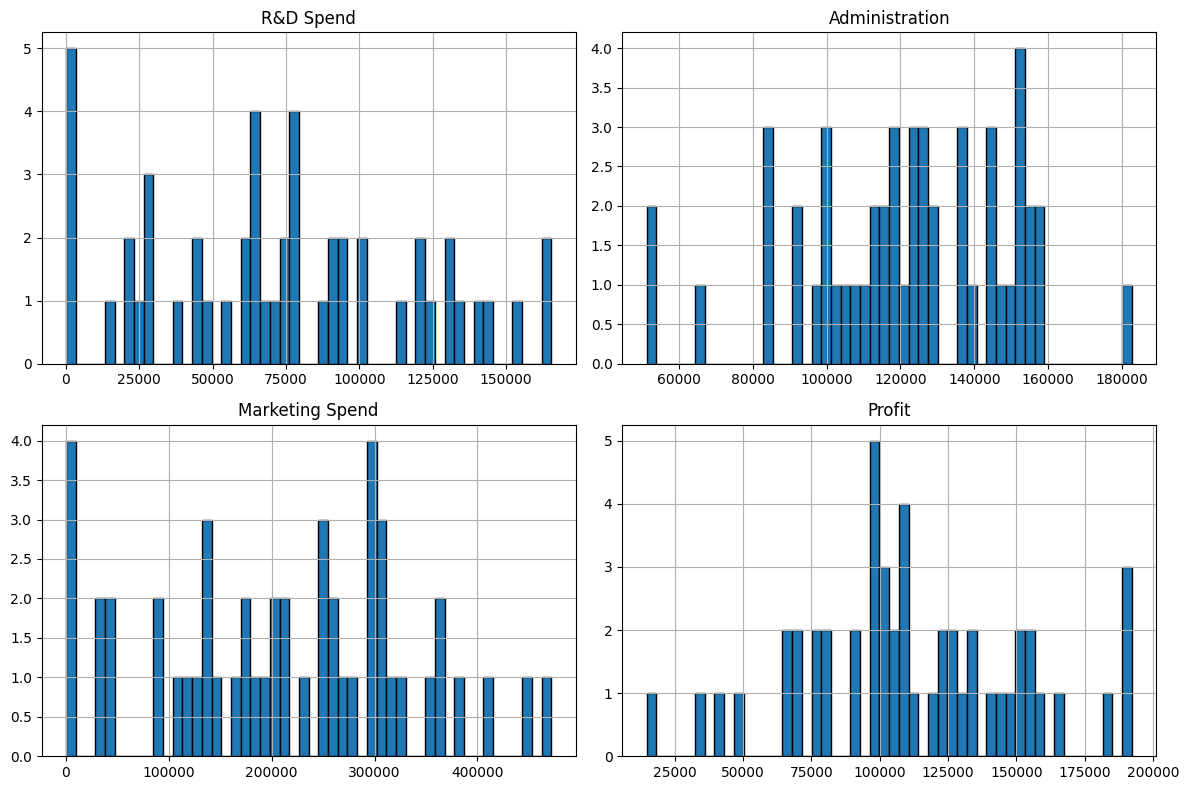

In [18]:
import matplotlib.pyplot as plt

# Create histograms for all numerical columns
data.hist(bins=50, figsize=(12, 8), edgecolor='black')

# Display the plots
plt.tight_layout()
plt.show()

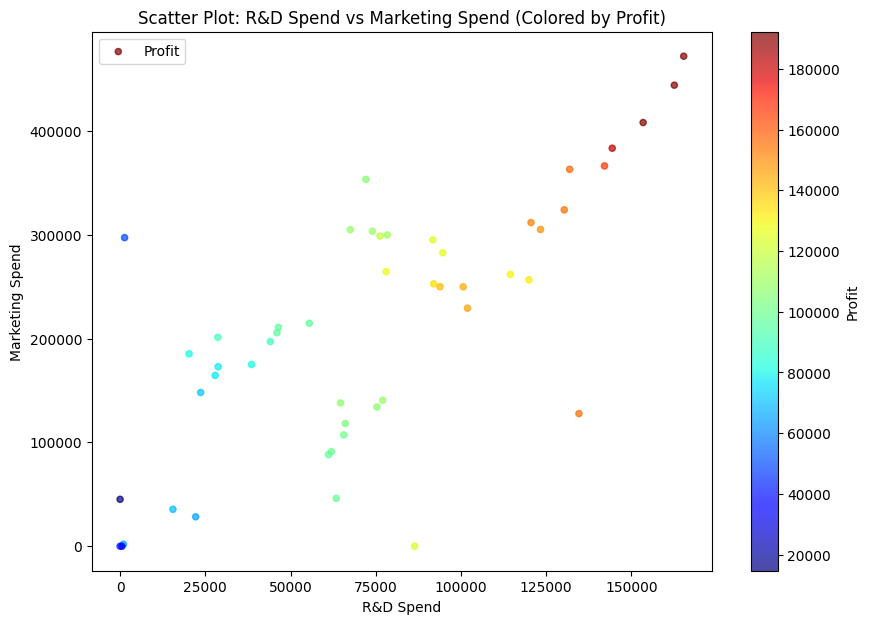

In [19]:
# Scatter plot for R&D Spend vs. Marketing Spend, colored by Profit
data.plot(
    kind="scatter",
    x="R&D Spend",
    y="Marketing Spend",
    c="Profit",
    cmap="jet",
    colorbar=True,
    figsize=(10, 7),
    alpha=0.7,
    label="Profit"
)

plt.title("Scatter Plot: R&D Spend vs Marketing Spend (Colored by Profit)")
plt.xlabel("R&D Spend")
plt.ylabel("Marketing Spend")
plt.legend()
plt.show()

In [20]:
# Check for missing values in the dataset
missing_values = data.isna().sum()

# Display the result
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [21]:
# Check data types of each column
data_types = data.dtypes

# Display the result
print("Data types of each column:")
print(data_types)

Data types of each column:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [24]:
X = data[["R&D Spend"]]
y = data["Profit"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [29]:
r2_score( y_test, y_pred)

0.9265108109341951

In [30]:
print(lr.intercept_)

49336.6680379911


In [31]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829])

In [32]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [33]:
#some bonus points.
#model persistance (saving and loading trained models)
import pickle

In [34]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [35]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [36]:
X[0:5]

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [37]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829, 188131.54561896, 180315.73844483, 172574.27208786,
       170640.7877067 ])

In [38]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127862.209964
39   81005.76   82250.563346
30   99937.59  102255.720782
45   64926.08   50190.473476
17  125370.37  130136.881905
